# 03 Build Models

## Imports

* We want AUC ROC

In [17]:
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Functions

In [18]:
def get_metrics(y_true, y_predict, print_scores = True):
    matrix_def = [['tn','fp'], ['fn','tp']]
    matrix = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = matrix.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    misclass = 1-accuracy
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)
    if print_scores:
        print('Matrix Definition')
        print(np.array(matrix_def))
        print('')
        print('Confusion Matrix')
        print(matrix)
        print('')
        print('METRICS')
        print('accuracy:', accuracy)
        print('misclass:', misclass)
        print('sensitivity:', sensitivity)
        print('specificity:', specificity)
    else:
        return accuracy, misclass, sensitivity, specificity, precision

## Read in Train and Test Data

In [19]:
with open('../Cleansed_Data/X_train_ss.pkl','rb') as f:
    X_train_ss = pickle.load(f)
    
with open('../Cleansed_Data/X_test_ss.pkl','rb') as f:
    X_test_ss = pickle.load(f)
    
with open('../Cleansed_Data/y_train.pkl','rb') as f:
    y_train = pickle.load(f)
    
with open('../Cleansed_Data/y_test.pkl','rb') as f:
    y_test = pickle.load(f)

## Try Simple Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(X_train_ss, y_train)
lr.score(X_train_ss, y_train), lr.score(X_test_ss, y_test)

get_metrics(lr.predict(X_test_ss), y_test)

Matrix Definition
[['tn' 'fp']
 ['fn' 'tp']]

Confusion Matrix
[[2484  132]
 [   5    6]]

METRICS
accuracy: 0.9478492577084127
misclass: 0.05215074229158734
sensitivity: 0.5454545454545454
specificity: 0.9495412844036697


## Try Neural Net

In [74]:
# Check number of inputs
print(X_train_ss.shape[1])
layer1 = X_train_ss.shape[1]
layer2 = 35

35


In [89]:
model = Sequential()
model.add(Dense(layer1, activation='relu', input_dim=X_train_ss.shape[1])) #Makes this dynamic
model.add(Dropout(.2))
model.add(Dense(layer2, activation='relu')) #Makes this dynamic
model.add(Dense(1, activation='sigmoid'))

In [90]:
adam = Adam(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['AUC'])

In [91]:
history = model.fit(X_train_ss, y_train, validation_data=(X_test_ss, y_test), epochs=50, batch_size=32, verbose=0)

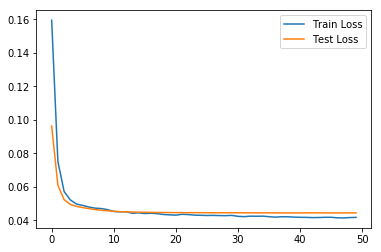

In [92]:
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

plt.legend()

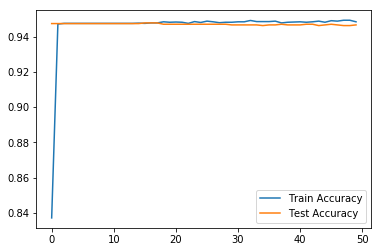

In [93]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend()

In [94]:
# Calculating AUC/ROC:
# Need tp and fp for model
y_test_hat = model.predict(X_test_ss)
# y_test = true y's

In [87]:
y_test_hat

array([[-0.03131648],
       [ 0.05927078],
       [ 0.0132129 ],
       ...,
       [ 0.10237353],
       [ 0.15173377],
       [ 0.1265243 ]], dtype=float32)

In [88]:
len(y_test_hat)

2627